As usual we start loading the packages that we will use in our notebook

In [215]:
# data preprocess tool 
import tensorflow as tf #no need to describe ;)
from sklearn import model_selection
from sklearn.preprocessing import LabelEncoder 
import numpy as np #allows array operation
import pandas as pd #we will use it to read and manipulate files and columns content
import re

## utils
from collections import Counter
import opencc
import warnings

# 忽略所有警告
warnings.filterwarnings('ignore')

In [216]:
#PRINT VERSION!!
tf.__version__

'2.14.0'

In [217]:
train_df = pd.read_csv("train_languages.csv")#here we have the dataset we extracted
train_df.head()

,Text,language
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian
1,sebes joseph pereira thomas på eng the jesuit...,Swedish
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil
4,de spons behoort tot het geslacht haliclona en...,Dutch


In [218]:
train_df[train_df["language"] == "Thai"]

,Text,language
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai
15,การฟาดฟันของบรรดาสาวงามในกองประกวด miss beauty...,Thai
66,titsingh i illustrations of japan consisting ...,Thai
69,ประเทศญี่ปุ่นออกอากาศทางช่อง สถานีโทรทัศน์นิปป...,Thai
104,ชีวิตพระวัดป่าบ้านตาด พระอาจารย์สุชาติ อภิชาโต...,Thai
...,...,...
21924,เนื่องจากมิดทาวน์ทาวเวอร์เป็นอาคารอเนกประสงค์ ...,Thai
21940,ในระหว่างเดือนมกราคม จนถึงเดือนมิถุนายน ประช...,Thai
21958,ตัวรถ เป็นรถโดยสารตอนเดียว ความยาว เมตร กว้าง...,Thai
21991,ในด้านสถาปัตยกรรมหรือสัญลักษณ์ของคริสต์ศาสนา “...,Thai


In [219]:
len(train_df) #we print the length, not a big one but sufficient

22000

A key step is to label encode the target variable from text to number


In [220]:
Y = train_df['language']

Counter(Y)

Counter({'Estonian': 1000,
         'Swedish': 1000,
         'Thai': 1000,
         'Tamil': 1000,
         'Dutch': 1000,
         'Japanese': 1000,
         'Turkish': 1000,
         'Latin': 1000,
         'Urdu': 1000,
         'Indonesian': 1000,
         'Portugese': 1000,
         'French': 1000,
         'Chinese': 1000,
         'Korean': 1000,
         'Hindi': 1000,
         'Spanish': 1000,
         'Pushto': 1000,
         'Persian': 1000,
         'Romanian': 1000,
         'Russian': 1000,
         'English': 1000,
         'Arabic': 1000})

| English      | Chinese      |
|--------------|--------------|
| Estonian     | 爱沙尼亚语   |
| Swedish      | 瑞典语       |
| Thai         | 泰语         |
| Tamil        | 泰米尔语     |
| Dutch        | 荷兰语       |
| Japanese     | 日语         |
| Turkish      | 土耳其语     |
| Latin        | 拉丁语       |
| Urdu         | 乌尔都语     |
| Indonesian   | 印度尼西亚语 |
| Portuguese   | 葡萄牙语     |
| French       | 法语         |
| Chinese      | 中文         |
| Korean       | 韩语         |
| Hindi        | 印地语       |
| Spanish      | 西班牙语     |
| Pashto       | 普什图语     |
| Persian      | 波斯语       |
| Romanian     | 罗马尼亚语   |
| Russian      | 俄语         |
| English      | 英语         |
| Arabic       | 阿拉伯语     |


In [221]:
Y = train_df['language']

Y

0        Estonian
1         Swedish
2            Thai
3           Tamil
4           Dutch
           ...   
21995      French
21996        Thai
21997     Spanish
21998     Chinese
21999    Romanian
Name: language, Length: 22000, dtype: object

In [222]:
train_df['language']

0        Estonian
1         Swedish
2            Thai
3           Tamil
4           Dutch
           ...   
21995      French
21996        Thai
21997     Spanish
21998     Chinese
21999    Romanian
Name: language, Length: 22000, dtype: object

In [223]:
Y = train_df['language']
encoder = LabelEncoder()
encoder.fit(Y)
Y = encoder.transform(Y)
Y = tf.keras.utils.to_categorical(
    Y,
    num_classes=22 #equals to the number of languages
)

Y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [224]:
encoder.classes_

array(['Arabic', 'Chinese', 'Dutch', 'English', 'Estonian', 'French',
       'Hindi', 'Indonesian', 'Japanese', 'Korean', 'Latin', 'Persian',
       'Portugese', 'Pushto', 'Romanian', 'Russian', 'Spanish', 'Swedish',
       'Tamil', 'Thai', 'Turkish', 'Urdu'], dtype=object)

As we mentioned in the slides we will perform the previous text processing steps except for stopword removal.

In [225]:
train_df

,Text,language
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian
1,sebes joseph pereira thomas på eng the jesuit...,Swedish
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil
4,de spons behoort tot het geslacht haliclona en...,Dutch
...,...,...
21995,hors du terrain les années et sont des année...,French
21996,ใน พศ หลักจากที่เสด็จประพาสแหลมมลายู ชวา อินเ...,Thai
21997,con motivo de la celebración del septuagésimoq...,Spanish
21998,年月，當時還只有歲的她在美國出道，以mai-k名義推出首張英文《baby i like》，由...,Chinese


In [226]:
list(set(train_df["language"]))

['Estonian',
 'Tamil',
 'Romanian',
 'Japanese',
 'Turkish',
 'English',
 'Dutch',
 'Indonesian',
 'Swedish',
 'Arabic',
 'Hindi',
 'Chinese',
 'French',
 'Urdu',
 'Russian',
 'Pushto',
 'Portugese',
 'Thai',
 'Korean',
 'Spanish',
 'Latin',
 'Persian']

In [227]:
train_df['sentence_lower'] = train_df["Text"].str.lower()
train_df['sentence_no_punctuation'] = train_df['sentence_lower'].str.replace('[^\w\s]','')
train_df['sentence_no_punctuation'] = train_df["sentence_no_punctuation"].fillna("fillna")

In [228]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [229]:
tf_train = train_df.copy()

In [230]:
max_features = 5000  # maximum number of words to keep, based on word frequency
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(tf_train['sentence_no_punctuation']))
sequences = tokenizer.texts_to_sequences(list(tf_train['sentence_no_punctuation']))



In [231]:
maxlen = 400  # maximum length of all sequences
tok_seq = pad_sequences(sequences, maxlen=maxlen)

In [239]:
tok_seq

array([[   0,    0,    0, ..., 2170,   82, 3638],
       [   0,    0,    0, ...,  223,   16, 4068],
       [   0,    0,    0, ...,    0,    0,    0],
       ...,
       [   0,    0,    0, ...,  118, 1435,  168],
       [   0,    0,    0, ...,   16, 2029,  471],
       [   0,    0,    0, ...,  245,  178,    1]])

In [233]:
from sklearn.model_selection import train_test_split #divide into train and test set

In [234]:
X_train, X_test, y_train, y_test = train_test_split(tok_seq, Y, test_size=0.1, random_state=42)

In [235]:
vocab_size = len(tokenizer.word_index) + 1 
maxlen = 400  # maximum length of all sequences
embedding_dim = 50 #this is the final dimension of the embedding space.

model = tf.keras.models.Sequential([
  tf.keras.layers.Embedding(input_dim=vocab_size,
                            output_dim=embedding_dim,
                            input_length=maxlen),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(22, activation=tf.nn.softmax) 
])


# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Early stopping and model checkpoint callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

#save model
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    'best_model.h5', monitor='val_loss', save_best_only=True)


model.summary()


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 400, 50)           13698400  
                                                                 
 lstm_5 (LSTM)               (None, 400, 64)           29440     
                                                                 
 dropout_5 (Dropout)         (None, 400, 64)           0         
                                                                 
 flatten_7 (Flatten)         (None, 25600)             0         
                                                                 
 dense_12 (Dense)            (None, 64)                1638464   
                                                                 
 dense_13 (Dense)            (None, 22)                1430      
                                                                 
Total params: 15367734 (58.62 MB)
Trainable params: 15

In [236]:
# Now you can fit this model to your data using these callbacks
model.fit(X_train, y_train, 
          validation_data=(X_test, y_test), 
          epochs=3, 
          callbacks=[early_stopping, model_checkpoint])

Epoch 1/3
212/619 [=========>....................] - ETA: 3:01 - loss: 1.3675 - accuracy: 0.6128

KeyboardInterrupt: 

In [237]:
y_pred = model.predict(X_test) #here we make predictions

69/69 [==============================] - 6s 75ms/step


In [241]:
y_pred

array([[1.5191665e-02, 2.5672114e-01, 8.8222520e-03, ..., 2.3368335e-01,
        1.2804005e-02, 3.6875112e-03],
       [5.5255050e-12, 7.4224845e-12, 5.2771972e-14, ..., 2.2005444e-09,
        6.2137248e-12, 3.9364393e-12],
       [1.9281866e-03, 2.6016674e-04, 1.3944851e-05, ..., 8.7322751e-06,
        1.5522691e-06, 2.0354963e-04],
       ...,
       [1.1333640e-05, 7.4770325e-04, 3.3668363e-03, ..., 9.1255968e-04,
        2.7988647e-04, 8.4157783e-04],
       [6.1551522e-04, 6.2342879e-06, 9.9856168e-01, ..., 1.3851641e-06,
        4.1679903e-07, 3.5657342e-07],
       [4.0744245e-03, 8.4677786e-03, 5.4478136e-05, ..., 1.1797746e-02,
        2.1404644e-02, 3.1131335e-02]], dtype=float32)

In [ ]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

## Confusion matrix

![cm](https://static.packt-cdn.com/products/9781838555078/graphics/C13314_06_05.jpg)

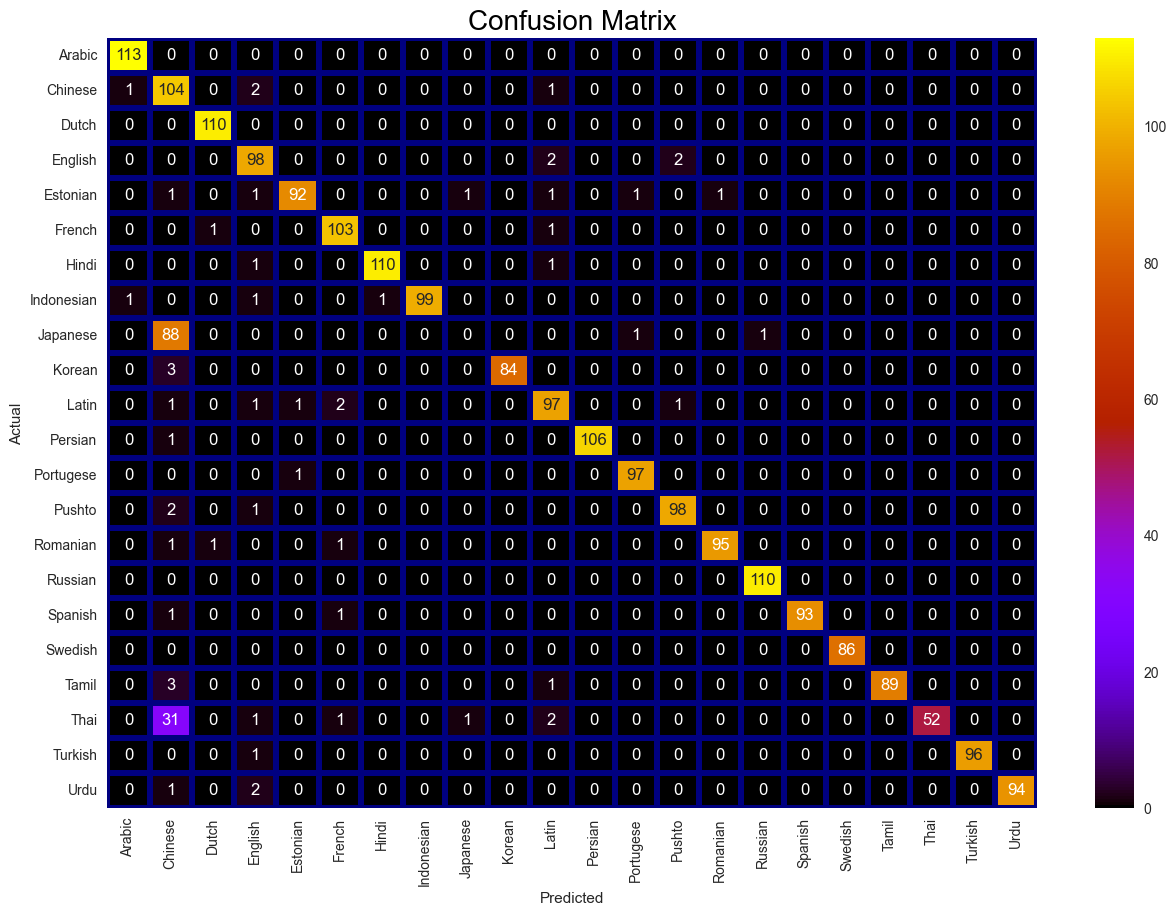

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

label_names = encoder.classes_.tolist()

# Convert probabilities to class labels
y_pred_labels = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

# Create the confusion matrix
cf_matrix = confusion_matrix(y_test_labels, y_pred_labels)

# Plotting the confusion matrix
plt.figure(figsize=(15, 10))
sns.heatmap(cf_matrix, annot=True, fmt="d", xticklabels=label_names, yticklabels=label_names, cmap="gnuplot",
            linewidths=3, linecolor='navy')
plt.title("Confusion Matrix", fontsize=20, color="black")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Classification Report

In [ ]:
print(classification_report(y_test_labels,y_pred_labels,target_names=label_names))

              precision    recall  f1-score   support

      Arabic       0.98      1.00      0.99       113
     Chinese       0.44      0.96      0.60       108
       Dutch       0.98      1.00      0.99       110
     English       0.90      0.96      0.93       102
    Estonian       0.98      0.94      0.96        98
      French       0.95      0.98      0.97       105
       Hindi       0.99      0.98      0.99       112
  Indonesian       1.00      0.97      0.99       102
    Japanese       0.00      0.00      0.00        90
      Korean       1.00      0.97      0.98        87
       Latin       0.92      0.94      0.93       103
     Persian       1.00      0.99      1.00       107
   Portugese       0.98      0.99      0.98        98
      Pushto       0.97      0.97      0.97       101
    Romanian       0.99      0.97      0.98        98
     Russian       0.99      1.00      1.00       110
     Spanish       1.00      0.98      0.99        95
     Swedish       1.00    

## ROC AUC

In [ ]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
y_test[:,1]

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

69/69 [==============================] - 7s 89ms/step


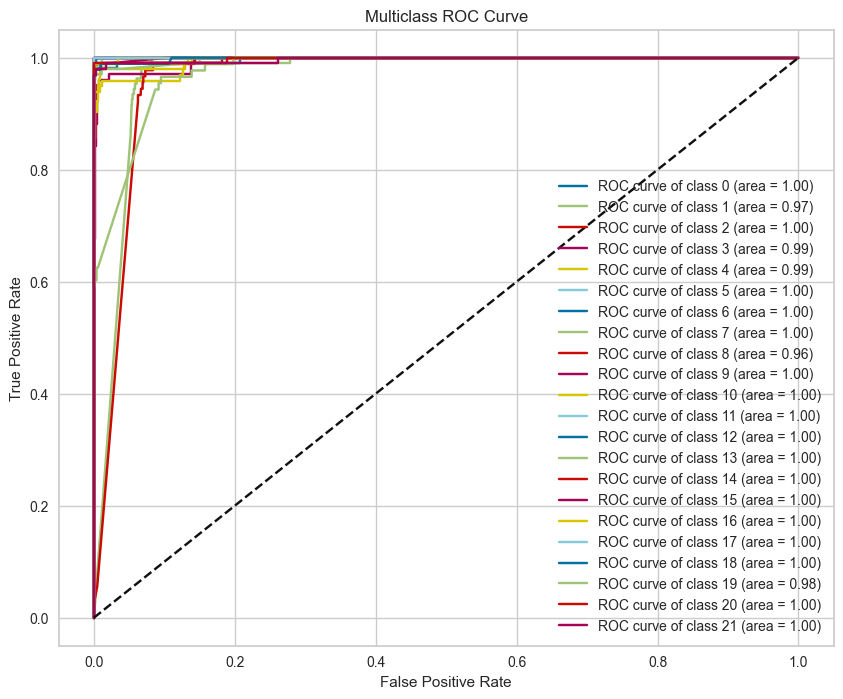

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming y_test is one-hot encoded and model_predictions are the softmax outputs of your model
model_predictions = model.predict(X_test)

# Calculate the ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
number_of_classes = 22
for i in range(number_of_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], model_predictions[:, i])
    # print(fpr[i], tpr[i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(10, 8))
for i in range(number_of_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--') # Dashed diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve')
plt.legend(loc="lower right")
plt.show()
